In [1]:
#Import dependencies

import matplotlib.pyplot as plt
import glob
import numpy as np
import pandas as pd
import os

In [2]:
#Determine location of files to append into one file

path = os.getcwd()
print(path)
folder_path = "\Crime by County/*.csv"
folder = path+folder_path
all_files = glob.glob(os.path.join(folder))
crime_by_county = []

for file in all_files:
    crime_data = pd.read_csv(file)
    crime_data['County'] = os.path.basename(file)
    crime_by_county.append(crime_data)
    
crime_by_county

C:\Users\AD05268\OneDrive - Lumen\Desktop\DataScienceBootcamp\Project\Project1


[                                          2012    2013    2014    2015  \
 0                               Crimes     NaN     NaN     NaN     NaN   
 1                       Violent Crimes  11,899  11,739  10,356   9,679   
 2                             Homicide     152     113     102     119   
 3   Rape (Forcible Rape prior to 2014)     477     362     423     568   
 4                                 Rape     407     323     377     521   
 ..                                 ...     ...     ...     ...     ...   
 59                           Under $50  12,008  10,653   9,936  10,944   
 60                               Arson     337     310     326     342   
 61                 Structural Property     174     130     111     133   
 62                     Mobile Property     109     109     158     149   
 63                      Other Property      54      71      57      60   
 
       2016    2017    2018    2019    2020    2021              County  
 0      NaN     NaN     

In [3]:
#combine all the crime by county dataframes into one dataframe
all_crime_df = pd.concat(crime_by_county,ignore_index=True)

#remove the last 7 characters (" County.csv") from the County column
all_crime_df['County'] = all_crime_df['County'].astype(str).str[:-4].astype(str)

#print dataframe
all_crime_df

,,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,County
0,Crimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alameda County
1,Violent Crimes,"11,899","11,739","10,356","9,679","10,127","9,923","9,948","9,734","9,645","10,524",Alameda County
2,Homicide,152,113,102,119,116,90,92,96,143,146,Alameda County
3,Rape (Forcible Rape prior to 2014),477,362,423,568,628,810,834,702,684,671,Alameda County
4,Rape,407,323,377,521,553,768,784,668,651,648,Alameda County
...,...,...,...,...,...,...,...,...,...,...,...,...
3707,Under $50,317,328,323,337,270,271,255,261,247,170,Yuba County
3708,Arson,27,19,19,15,27,31,33,20,41,28,Yuba County
3709,Structural Property,17,7,5,8,13,12,14,5,14,8,Yuba County
3710,Mobile Property,4,7,9,2,7,10,9,6,13,11,Yuba County


In [4]:
#change total Crime Description column name
crime_df = all_crime_df.rename(columns={'\xa0':"Crime Description"})

#drop 2012-2016 columns
crime_df = crime_df.drop(['2012','2013','2014','2015','2021'],axis=1)

#filter by 3 total crimes
filtered_crime_df = crime_df.loc[(crime_df["Crime Description"]=="Violent Crimes")
                              | (crime_df["Crime Description"]=="Property Crimes")
                              | (crime_df["Crime Description"]=="Arson")]
filtered_crime_df

,Crime Description,2016,2017,2018,2019,2020,County
1,Violent Crimes,"10,127","9,923","9,948","9,734","9,645",Alameda County
26,Property Crimes,"59,744","63,861","58,856","66,731","58,293",Alameda County
60,Arson,371,439,444,381,495,Alameda County
65,Violent Crimes,6.0,13.0,12.0,13.0,19.0,Alpine County
90,Property Crimes,34.0,32.0,29.0,32.0,14.0,Alpine County
...,...,...,...,...,...,...,...
3610,Property Crimes,"5,368","5,656","5,793","6,644","6,426",Yolo County
3644,Arson,52,73,51,88,77,Yolo County
3649,Violent Crimes,318,325,341,326,404,Yuba County
3674,Property Crimes,"1,944","2,072","1,856","1,844","1,841",Yuba County


In [5]:
#calculate total crime by county by year
filtered_crime_df[['2016','2017','2018','2019','2020']] = filtered_crime_df[['2016','2017','2018','2019','2020']] .replace(',', '', regex=True).astype(float)

county_crime_df = filtered_crime_df.groupby(['County']).sum()
county_crime_df.reset_index(inplace=True)
county_crime_df

C:\Users\AD05268\Anaconda3\envs\pythondata\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,County,2016,2017,2018,2019,2020
0,Alameda County,70242.0,74223.0,69248.0,76846.0,68433.0
1,Alpine County,40.0,45.0,41.0,45.0,33.0
2,Amador County,765.0,769.0,721.0,795.0,745.0
3,Butte County,8310.0,8375.0,7120.0,6421.0,5546.0
4,Calaveras County,834.0,998.0,1057.0,983.0,924.0
5,Colusa County,403.0,421.0,426.0,410.0,396.0
6,Contra Costa County,33033.0,33797.0,31644.0,32901.0,27854.0
7,Del Norte County,783.0,862.0,741.0,931.0,862.0
8,El Dorado County,3439.0,3233.0,3353.0,2886.0,2945.0
9,Fresno County,38239.0,36623.0,33648.0,28206.0,31052.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35')

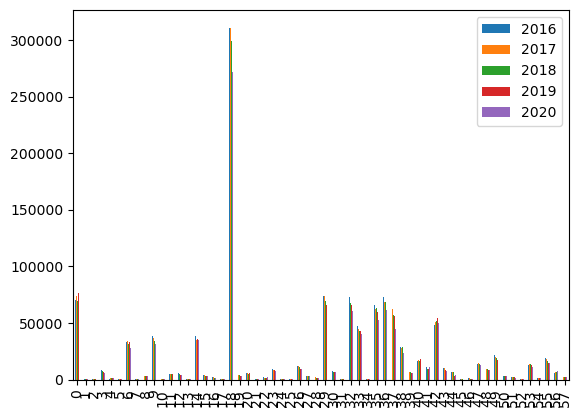

In [6]:
county_crime_df.plot(kind='bar')
plt.xticks(rotation=90)

In [7]:
county_crime_df.to_csv('county_crime_df.csv')

In [8]:
county_crime_df

,County,2016,2017,2018,2019,2020
0,Alameda County,70242.0,74223.0,69248.0,76846.0,68433.0
1,Alpine County,40.0,45.0,41.0,45.0,33.0
2,Amador County,765.0,769.0,721.0,795.0,745.0
3,Butte County,8310.0,8375.0,7120.0,6421.0,5546.0
4,Calaveras County,834.0,998.0,1057.0,983.0,924.0
5,Colusa County,403.0,421.0,426.0,410.0,396.0
6,Contra Costa County,33033.0,33797.0,31644.0,32901.0,27854.0
7,Del Norte County,783.0,862.0,741.0,931.0,862.0
8,El Dorado County,3439.0,3233.0,3353.0,2886.0,2945.0
9,Fresno County,38239.0,36623.0,33648.0,28206.0,31052.0
